First install and import the brian package

In [0]:
#import os
#os.chdir("/content/drive/My Drive/Neuro/HW02")

In [0]:
!pip install brian2

In [0]:
from brian2 import *
import draw_utils

**Section 1** - 
**Hodgkin-Huxley Model**

first we define the parameters and equations:

In [0]:
start_scope()

#parameters
Cm = 200*pF
El = -65*mV
Ek = -90*mV
ENa = 50*mV
gNa = 20*uS
gK = 6*uS
gl = 10*psiemens # in brian example gl is 10nS
VT = -63*mV

#equations
eqs = '''
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-Ek) + I)/Cm : volt
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/(exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/(exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/(exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(exp((40.*mV-v+VT)/(5.*mV))+1)/ms*h : 1
I : amp
'''

#defining NewtWork
G = NeuronGroup(1, eqs, method='exponential_euler', threshold='v>-50*mV', refractory='v>-50*mV')

Question 1

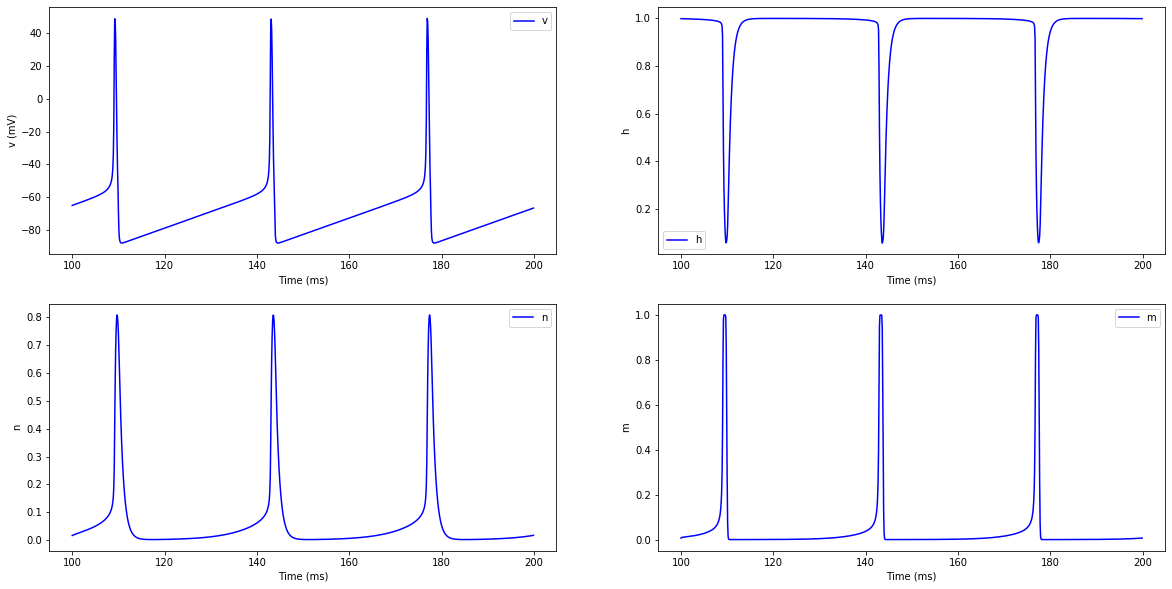

In [5]:
G.I = 200*pA
G.v = El

statemon_v = StateMonitor(G, 'v', record=True)
statemon_h = StateMonitor(G, 'h', record=True)
statemon_n = StateMonitor(G, 'n', record=True)
statemon_m = StateMonitor(G, 'm', record=True)
run(100*ms)

plt.figure(figsize=(20,10))

subplot(2,2,1)
plot(statemon_v.t/ms, statemon_v.v[0]/mV, '-b', label='v')
xlabel('Time (ms)')
ylabel('v (mV)')
legend(loc='best')

subplot(2,2,2)
plot(statemon_h.t/ms, statemon_h.h[0], '-b', label='h')
xlabel('Time (ms)')
ylabel('h')
legend(loc='best')

subplot(2,2,3)
plot(statemon_n.t/ms, statemon_n.n[0], '-b', label='n')
xlabel('Time (ms)')
ylabel('n')
legend(loc='best')

subplot(2,2,4)
plot(statemon_m.t/ms, statemon_m.m[0], '-b', label='m')
xlabel('Time (ms)')
ylabel('m')
legend(loc='best')

note that the simulation is from t=100 to t=200

----------------------------------------------




Question 2

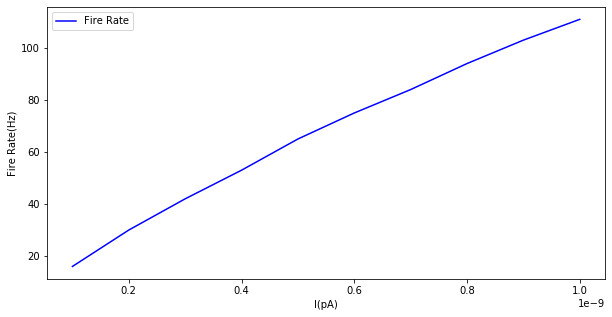

In [6]:
t = []
Irange = numpy.linspace(1,10,10) * 100*pA;
for j in Irange:
  spikemon = SpikeMonitor(G)
  G.I = j
  run(1000*ms)
  t.append(len(spikemon.t)/(1000*ms))

plt.figure(figsize=(10,5))
plot(Irange, t,'-b', label = 'Fire Rate')
xlabel('I(pA)')
ylabel('Fire Rate(Hz)')
legend(loc='best')

As "Iext" is increased, number of spikes in an exact run time increases. This effect is due to influence of "I" in differential equation of "v". As "I" is increased the probability of passing the voltage threshold increases so we expect more spikes during the same time.

---------------------------



Question 3

Text(0, 0.5, 'v(mV)')

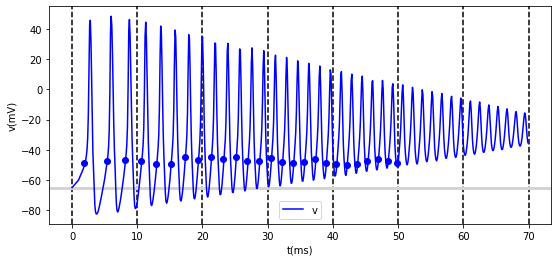

In [16]:
start_scope() # because of an error we must make a new network object
G = NeuronGroup(1, eqs, method='exponential_euler', threshold='v>-50*mV', refractory='v>-50*mV') 
G.v = El
statemon = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G, 'v', record=True)

G.I = 0*nA
G.run_regularly('I = I + 1*nA', dt=1*ms)
run(70*ms)
plt.figure(figsize=(9, 4))
for l in range(8):
    axvline(l*10, ls='--', c='k')
axhline(El/mV, ls='-', c='lightgray', lw=3)
plot(statemon.t/ms, statemon.v[0]/mV, '-b', label='v')
plot(spikemon.t/ms, spikemon.v/mV, 'ob')
legend(loc='best')
xlabel('t(ms)')
ylabel('v(mV)')

First we can see that as "Iext" is increased, fire rate increases. Just like what we saw in question 2. 

As "Iext" increases, the probability of "n" becomes more and more and after an exact amount of "Iext" n is so much high respect to voltage that it losese ability to spike and becomes stable

---------------------------------------------------


Question 4

Text(0, 0.5, 'n')

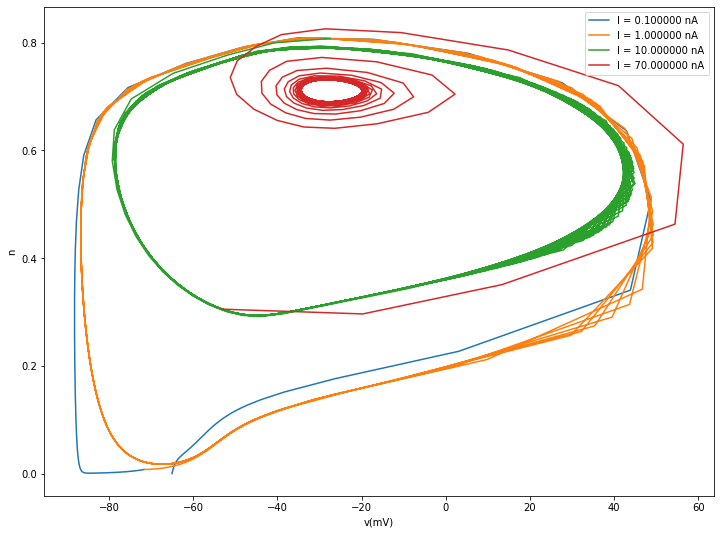

In [51]:
start_scope()
G = NeuronGroup(1, eqs, method='exponential_euler', threshold='v>-50*mV', refractory='v>-50*mV') 
G.v = El
Irange = [0.1 , 1, 10, 70] * 1*nA
plt.figure(figsize=[12,9])
for j in Irange:
  statemon_v = StateMonitor(G, 'v', record=True)
  statemon_n = StateMonitor(G, 'n', record=True)
  G.I = j
  run(50*ms)
  s = "I = %f nA" % (j/nA)
  plot(statemon_v.v[0]/mV, statemon_n.n[0], label=s)
legend(loc='best')
xlabel("v(mV)")
ylabel("n")

This plot is actually the 2D phase plot of "n-v" but only has the limit cycles. As "Iext" increases, the fixed point moves and a bifurcation happens in behavior of neuron and it starts spiking, as "Iext" increases more, the fixed point moves to a stable area and becomes stable so spiking doesnt happen. We can see the same effect in question 3 which neuron becomes stable.

-----------------------------


Question 5

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


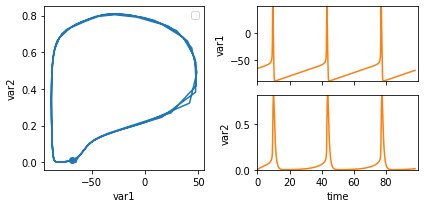

In [57]:
start_scope()
G = NeuronGroup(1, eqs, method='exponential_euler', threshold='v>-50*mV', refractory='v>-50*mV') 
G.v = El
G.I = 200*pA
statemon_v = StateMonitor(G, 'v', record=True)
statemon_n = StateMonitor(G, 'n', record=True)
run(100*ms)
time = statemon_v.t/ms
nState = statemon_n.n[0]
vState = statemon_v.v[0]/mV
draw_utils.phaseplane_animation(time, vState, nState)
#It appears that Jupyter enviroment cant play gifs but the .gif file is included as a seprate file

End of Section 1

--------------------------------------

**Section 2 - FitzHugh-Nagumo Model**



In [0]:
start_scope()

#parameters
#...

#equations
eqs2 = '''
dv/dt = v/ms - (v**3)/ms - W/ms + I/ms : 1
dW/dt = (.08/ms)*(v + .7 - .8*W): 1
I : 1
'''

G2 = NeuronGroup(1, eqs2, method='euler')

In [0]:
Irange = [0, 0.3, 0.4, 0.8, 1.5]
v_states = []
W_states = []
for j in Irange:
  start_scope()
  G2 = NeuronGroup(1, eqs2, method='euler')
  G2.W = -0.5
  G2.v = -2
  G2.I = j
  statemon_v = StateMonitor(G2, 'v', record=True)
  statemon_W = StateMonitor(G2, 'W', record=True)
  run(200*ms)
  v_states.append(statemon_v.v[0])
  W_states.append(statemon_W.W[0])
  time1 = statemon_v.t/ms

-------------------------------------------


Question 1

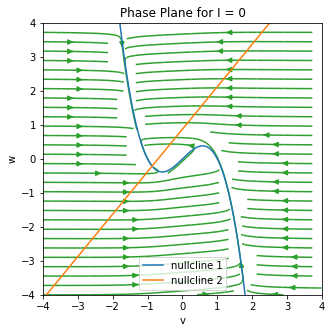

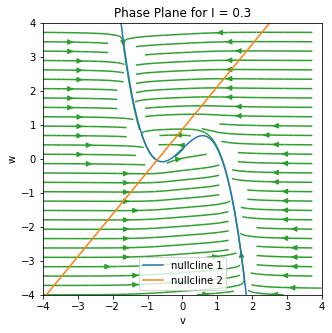

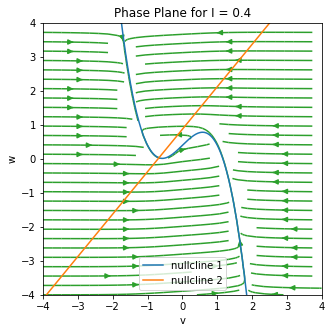

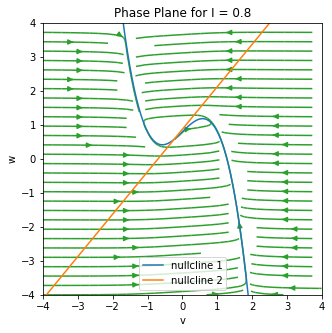

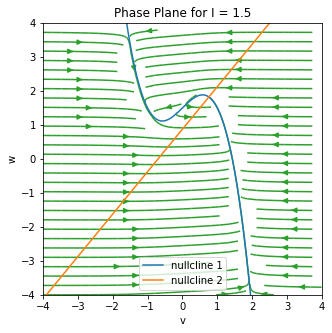

In [95]:
def F(V, W, params):
    return V - V**3 - W + params

def G(V, W, params):
    return 0.08*(V + 0.7 - 0.8*W)

def f_null1(v, params):
    return v - v**3 + params

def f_null2(v, params):
    return v/0.8 + 7/8


Irange = [0, 0.3, 0.4, 0.8, 1.5]
for j in Irange:
  params = [j]
  draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params, x_range=[-4,4], y_range=[-4,4])
  xlabel("v")
  ylabel("w")
  title("Phase Plane for I = {}".format(j))

-------------------------------------------------


Question 2

Text(0, 0.5, 'w')

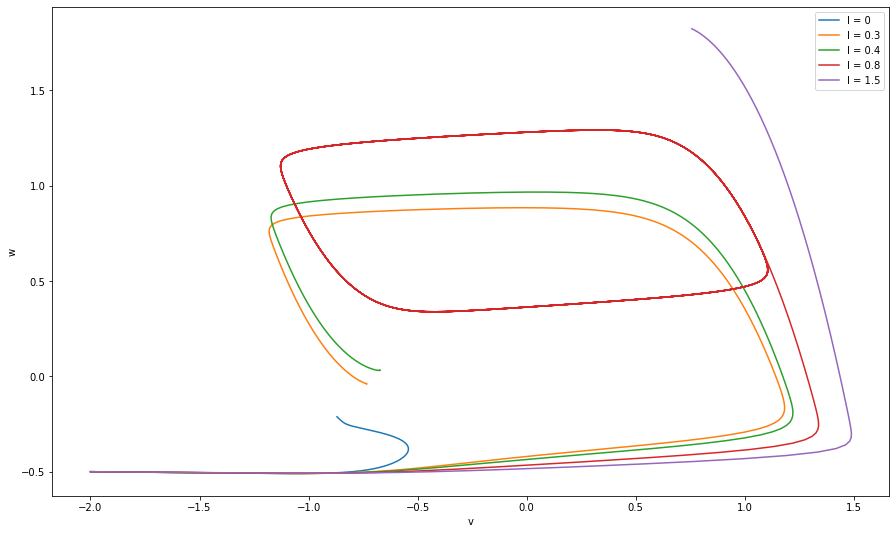

In [127]:
plt.figure(figsize=(15,9))
for j in range(5):
  plot(v_states[j], W_states[j],label='I = {}'.format(Irange[j]))
legend(loc='best')
xlabel('v')
ylabel('w')

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


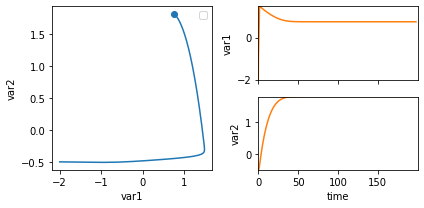

In [126]:
# Gifs are saved as .gif files and are included as seperate files with name format: "Section2Q2_'I'.gif" e.g. "Section2Q2_0_3.gif" for I=0.3
#draw_utils.phaseplane_animation(time1, v_states[0], W_states[0])
#draw_utils.phaseplane_animation(time1, v_states[1], W_states[1])
#draw_utils.phaseplane_animation(time1, v_states[2], W_states[2])
#draw_utils.phaseplane_animation(time1, v_states[3], W_states[3])
draw_utils.phaseplane_animation(time1, v_states[4], W_states[4])

-------------------------------------------------


Question 3

consider


$dx/dt = f(x,w)$


$dw/dt = g(x,w)$


We can linearize $f$ and $g$ near fixed points and find out about sability of them.

So first we need to find fixed points for each $I_{ext}$. Then we must calculate eigenvalues $\lambda_i$.

For each fixed point if $\lambda_i < 0$, it's stable.   

$$$$
Finding fixed points:
$$\frac{dv}{dt} = f = v - v^3 - w + I \rightarrow v-v^3-w+I=0$$
$$\frac{dw}{dt} = g = 0.08(v + 0.7 - 0.8w) \rightarrow v+0.7-0.8w=0$$
$$$$
$$v - v^3 + I = 1.25v + 0.875 \rightarrow v^3 + 0.25v +0.875-I=0$$
$$$$
Jacobian matrix:

$$\frac{\partial f}{\partial v} , \frac{\partial f}{\partial w} , \frac{\partial g}{\partial v} ,  \frac{\partial g}{\partial w}$$

$$\frac{\partial f}{\partial v} = 1-3v^2 , \frac{\partial f}{\partial w} = -1 , \frac{\partial g}{\partial v} = 0.08 , \frac{\partial g}{\partial w} = -0.064$$
$$$$
As we can see, stability of each fixed point, only depends on $"v"$



-----------------------------------

finding fixed point:


for I = 0, v is "-0.869601930608347" and w is "-0.212002413260433"
for I = 0.3, v is "-0.731879836839147" and w is "-0.0398497960489339"
for I = 0.4, v is "-0.674197105603568" and w is "0.0322536179955405"
for I = 0.8, v is "-0.242768355847071" and w is "0.571539555191161"
for I = 1.5, v is "0.757990113846410" and w is "1.82248764230801"


Text(0.5, 1.0, 'fixed points for ecah $I$')

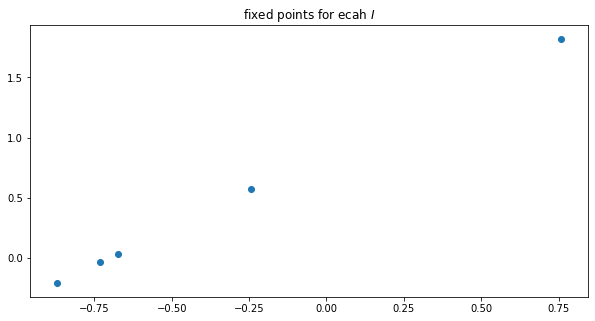

In [150]:
from sympy import symbols, solve
x = symbols('x')
v_fp = []
w_fp = []
expr = x**3 + 0.25*x + 0.875
for j in Irange:
  sol = solve(expr-j)
  print("for I = {}, v is \"{}\" and w is \"{}\"".format(j,sol[0],sol[0]/0.8 + 7/8))
  v_fp.append(sol[0])
  w_fp.append(sol[0]/0.8 + 7/8)

plt.figure(figsize=(10,5))
scatter(v_fp,w_fp)
title("fixed points for ecah $I$")

Finding Jacobian Matrix and eigenvalues:

In [176]:
from sympy import symbols, solve
l = symbols('l')
eig = []
J = []
f2 = -1
g1 = 0.08
g2 = -0.064
for j in range(5):
  f1 = 1 - 3 * v_fp[j]
  J.append([f1, f2, g1, g2])
  tau = f1 + g2
  delta = f1*g2 - f2*g1
  equ = l**2 - tau*l + delta
  sol = solve(equ)
  eig.append(sol)
  print("eigenvalues for I = {} are {}".format(Irange[j] , eig[j]))

eigenvalues for I = 0 are [-0.0420875549071833, 3.58689334673222]
eigenvalues for I = 0.3 are [-0.0392697857425270, 3.17090929625997]
eigenvalues for I = 0.4 are [-0.0378600650630100, 2.99645138187371]
eigenvalues for I = 0.8 are [-0.0181940801366155, 1.68249914767783]
eigenvalues for I = 1.5 are [-1.20378144679549, -0.134188894743744]


$$I=0 \rightarrow unstable$$ 
$$I=0.3 \rightarrow unstable$$ 
$$I=0.4 \rightarrow unstable$$ 
$$I=0.8 \rightarrow unstable$$ 
$$I=1.5 \rightarrow stable$$ 